# Telecom Churn Case Study Hackathon : 
### **Predict churning customers for a Telecom company based on temporal behaviour**

----

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, and build predictive models to identify customers at high risk of churn.

In this case study, our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Goal

It is our job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Our target variable is "churn_probability".

## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

**The ‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

**The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

**The ‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase.

*In this case, since we are working over a three-month window, the first two months are the ‘good’ phase and 'action' phase, the third month is the ‘churn’ phase.*

## Data Dictionary

Before proceeding to analyze the data for telecom company, let's go through the main data dictionary terms:

| Acronyms | Description |
| --- | --- |
| CIRCLE_ID |	Telecom circle area to which the customer belongs to |
| LOC |	Local calls  within same telecom circle |
| STD |	STD calls  outside the calling circle |
| IC |	Incoming calls |
| OG |	Outgoing calls |
| T2T |	Operator T to T ie within same operator mobile to mobile |
| T2M |    	Operator T to other operator mobile |
| T2O |    	Operator T to other operator fixed line |
| T2F |    	Operator T to fixed lines of T |
| T2C |    	Operator T to its own call center |
| ARPU |    	Average revenue per user |
| MOU |    	Minutes of usage  voice calls |
| AON |    	Age on network  number of days the customer is using the operator T network |
| ONNET |   	All kind of calls within the same operator network |
| OFFNET |    	All kind of calls outside the operator T network |
| ROAM |	Indicates that customer is in roaming zone during the call |
| SPL |   	Special calls |
| ISD |    	ISD calls |
| RECH |   	Recharge |
| NUM |    	Number |
| AMT |    	Amount in local currency |
| MAX |    	Maximum |
| DATA |    	Mobile internet |
| 3G |    	G network |
| AV |    	Average |
| VOL |    	Mobile internet usage volume in MB |
| 2G |    	G network |
| PCK |    	Prepaid service schemes called  PACKS |
| NIGHT |    	Scheme to use during specific night hours only |
| MONTHLY |    	Service schemes with validity equivalent to a month |
| SACHET |   	Service schemes with validity smaller than a month |
| \*.6 |    	KPI for the month of June |
| \*.7 |    	KPI for the month of July |
| \*.8 |    	KPI for the month of August |
| FB_USER |	Service scheme to avail services of Facebook and similar social networking sites |
| VBC |    	Volume based cost  when no specific scheme is not purchased and paid as per usage |

### Note : 
For this data, the columns are arranged by taking various terms at once and can be read by considering respective filters at once. For e.g. column "loc_ic_t2o_mou" means **Minutes of usage of voice calls by Operator T to other operator fixed line for Incoming calls as Local calls  within same telecom circle**

### Approach of Solving the problem:
    
**We are going to solve the problem in following sections i.e. :**
- Data understanding and exploration
- Data Visualisation and Data preparation
- Model selection, model building, evaluation & prediction
- Final Insights and Conclusion
- Evaluating final model on the Kaggle test data


# *`Step 1: Data understanding and exploration`*

In [161]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import sweetviz as sv
import missingno as mn

import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [162]:
# Reading the data
data = pd.read_csv(r'C:\Upgrad Program\Machine Learning 2\Telecom Churn case study\telecom-churn-case-study-hackathon-c48/train.csv')
# taking test data to get the same set of columns after pre-processing steps, which will help at the end to predict the target variable
Kaggle_test_dataset = pd.read_csv(r'C:\Upgrad Program\Machine Learning 2\Telecom Churn case study\telecom-churn-case-study-hackathon-c48\test.csv')

In [163]:
# Getting an overview of data 
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [164]:
# Shape of data
data.shape

(69999, 172)

In [165]:
# getting an idea of numeric values
data.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [166]:
# Features of data
data.columns.values

array(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8

In [167]:
# Let's analyze the data with a different approach this time, using sweetviz library. 
sweet_report = sv.analyze(data,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


> **Insights:** We will be not using this report for our EDA/feature engineering here, but verying our process with above report will make our work more reliable 

In [168]:
# create backup of data
original = data.copy()

In [169]:
# creating column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',             
            ]
        
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             ]

num_cols = [column for column in data.columns 
                if column not in id_cols + date_cols + cat_cols]

In [170]:
# The number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % 
      (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6


In [171]:
# checking if any columns are missed or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == data.shape[1])

True


arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

<AxesSubplot:>

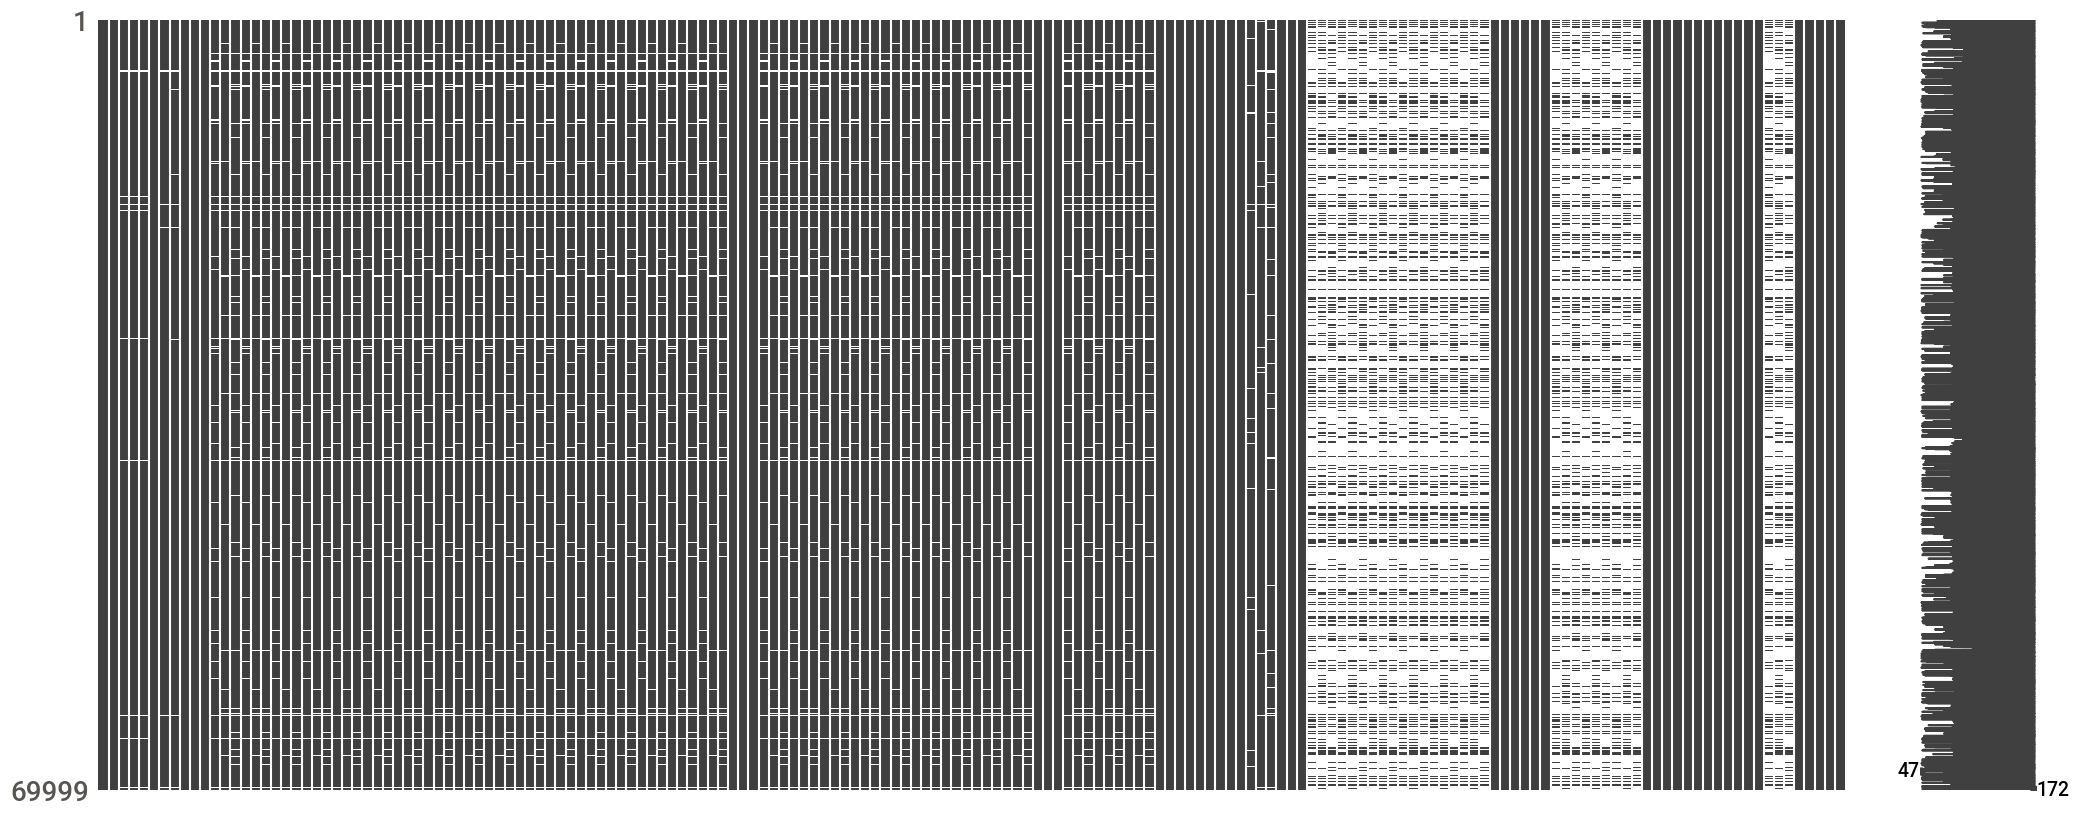

In [172]:
# looking for missing values
print((data.isnull().sum()*100/data.shape[0]).sort_values(ascending=False))

# verifying through missingno library 
mn.matrix(data)

> **Insights:** We can see there are many columns which have missing values. There are approx 74-75% null values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing.

In [173]:
# Let's start with all the recharge columna and analyze the missing values
recharge_cols = []
for col in data.columns:
    if "rech" in col:
        recharge_cols.append(col)
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [174]:
# considering only recharge columns, not date columns 
recharge_cols = ['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

data[recharge_cols].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,82.000000,92.000000,84.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000
75%,9.000000,10.000000,9.000000,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000
max,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,5920.000000,4365.000000,4076.000000


In [175]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


> **Insights:** In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month.

In [176]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

# impute missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [177]:
# impute missing values with 0 for kaggle test set
Kaggle_test_dataset[zero_impute] = Kaggle_test_dataset[zero_impute].apply(lambda x: x.fillna(0))

In [178]:
# checking for missing values, after imputing
data[zero_impute].isnull().sum()*100/data.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

### As we have no variance in Id and Date columns, its safe to drop those columns and make the data more simpler

In [179]:
# Dropping the columns 
print("Shape before dropping: ", data.shape) #before dropping
data = data.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", data.shape) #after dropping

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 161)


In [180]:
# Dropping the columns 
print("Shape before dropping: ", Kaggle_test_dataset.shape) #before dropping
Kaggle_test_dataset = Kaggle_test_dataset.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", Kaggle_test_dataset.shape) #after dropping

Shape before dropping:  (30000, 171)
Shape after dropping:  (30000, 160)


### Replacing NaN values from categorical columns to make the new value as new category. We will replace it with "-1"

In [181]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

In [182]:
Kaggle_test_dataset[cat_cols] = Kaggle_test_dataset[cat_cols].apply(lambda x: x.fillna(-1))

In [183]:
#checking missing values from categorical columns
data[cat_cols].isnull().sum()*100/data.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

### Dropping variables with more than a given threshold of missing values

In [184]:
data.shape
Kaggle_test_dataset.shape

(69999, 161)

(30000, 160)

In [185]:
initial_cols = data.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(data.apply(lambda column: True if column.isnull().sum()/data.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [186]:
# Now we will drop those columns,having mssing values above the threshold
data = data.loc[:, include_cols]

dropped_cols = data.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-12 columns dropped.


In [187]:
initial_cols_test = Kaggle_test_dataset.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(Kaggle_test_dataset.apply(lambda column: True if column.isnull().sum()/Kaggle_test_dataset.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':Kaggle_test_dataset.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

# Now we will drop those columns,having mssing values above the threshold
Kaggle_test_dataset = Kaggle_test_dataset.loc[:, include_cols]

dropped_cols = Kaggle_test_dataset.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


-13 columns dropped.


In [188]:
# imputing the respective null columns as 0. 
data[data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = data[data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [189]:
# imputing the respective null columns as 0 in test set 
Kaggle_test_dataset[Kaggle_test_dataset.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = Kaggle_test_dataset[Kaggle_test_dataset.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

## Classifying High Value Customers 

Before proceeding the data visualization criteria, we need to filter out the high value customers, which refers to those customers whose recharge amounts are quite considerable or in the upper zone, and can be considerd as a regular user of the service. As per the definition, those who have recharged with an amount more than or equal to X, where X is the **75th percentile** of the average recharge amount in the first two months (the good phase).So, we will first get all the column details of recharge amounts of three months.

In [190]:
# Observing recharge columns
rch_data=data.columns[data.columns.str.contains('rech_amt|rech_data')]
print("Recharge related columns :\n", rch_data)

# getting overview of the recharge columns
data.loc[:,rch_data].describe()

Recharge related columns :
 Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,0.619309,0.683981,0.697867,31.748339,32.260075,32.986614,48.395787,51.415168,51.782975
std,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,1.762010,1.943193,1.973434,77.519536,78.069163,78.808337,126.923180,133.246541,131.291162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,8.000000,17.000000,23.000000
max,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


### Let's take the index of null vals for columns total_rech_data and av_rech_amt_data, of each month and verify if both the columns matche or not. If the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.

In [191]:
res = data.total_rech_data_6[data.total_rech_data_6.isna()].index != data.av_rech_amt_data_6[data.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = data.total_rech_data_7[data.total_rech_data_7.isna()].index != data.av_rech_amt_data_7[data.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =data.total_rech_data_8[data.total_rech_data_8.isna()].index != data.av_rech_amt_data_8[data.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


> **Insights:** We can see that if total_rech_data is null then av_rech_amt_data is also null

In [192]:
# calculating the total data recharge amount for June and July --> number of recharges * average recharge amount
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

In [193]:
# Total recharge amount for June and July 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [194]:
# calculate average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [195]:
#implementing the same claculation for kaggle test data
Kaggle_test_dataset['total_data_rech_6'] = Kaggle_test_dataset.total_rech_data_6 * Kaggle_test_dataset.av_rech_amt_data_6
Kaggle_test_dataset['total_data_rech_7'] = Kaggle_test_dataset.total_rech_data_7 * Kaggle_test_dataset.av_rech_amt_data_7
Kaggle_test_dataset['amt_data_6'] = Kaggle_test_dataset.total_rech_amt_6 + Kaggle_test_dataset.total_data_rech_6
Kaggle_test_dataset['amt_data_7'] = Kaggle_test_dataset.total_rech_amt_7 + Kaggle_test_dataset.total_data_rech_7
Kaggle_test_dataset['av_amt_data_6_7'] = (Kaggle_test_dataset.amt_data_6 + Kaggle_test_dataset.amt_data_7)/2

In [196]:
# overview of new columns
data[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].describe()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,485.760093,148.479217,172.524819,476.619005,494.901182
std,861.075228,749.012768,856.608088,914.825016,1024.531353
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.000000,0.000000,0.000000,110.000000,110.000000
50%,275.500000,0.000000,0.000000,266.000000,259.000000
75%,553.000000,8.000000,17.000000,550.000000,550.000000
max,37762.500000,55296.000000,55080.000000,57866.000000,56075.000000


In [197]:
# 75th percentile recharge amount
print("Recharge amount at 75th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.75)))

Recharge amount at 75th percentile: 553.0


In [198]:
# Extracting High value customers where total average recharge amount for good phase > 75th percentile
high_val_cust = data.loc[data.av_amt_data_6_7 > data.av_amt_data_6_7.quantile(0.75), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(17495, 154)

In [199]:
print("Number of rows before filtering the high value customers =", len(data))
print("Number of rows after filtering the high value customers =", len(high_val_cust))

Number of rows before filtering the high value customers = 69999
Number of rows after filtering the high value customers = 17495


In [200]:
# for Kaggle test dataset, we are including all the data and not taking the high value customers, so the number of rows should be same
print("Number of rows for whole Kaggle dataset =", len(Kaggle_test_dataset))

Number of rows for whole Kaggle dataset = 30000


In [201]:
# delete variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_cust.shape

(17495, 149)

> **Insights:** We're left with 17495 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 75th percentile customer.

In [202]:
# change data type to category
high_val_cust.churn_probability = high_val_cust.churn_probability.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn_probability.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
0.0    91.860532
1.0     8.139468
Name: churn_probability, dtype: float64


 > **Insights:** We can see that approx. 8.1% of high value customers have churned

### Now we will calculate difference variable as the difference between 8th month and the average of 6th and 7th month. This is important to analyse the difference between the good phase and churn phase.

In [203]:
high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)

high_val_cust['total_rech_data_diff'] = high_val_cust.total_rech_data_8 - ((high_val_cust.total_rech_data_6 + high_val_cust.total_rech_data_7)/2)

high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)

high_val_cust['av_rech_amt_data_diff'] = high_val_cust.av_rech_amt_data_8 - ((high_val_cust.av_rech_amt_data_6 + high_val_cust.av_rech_amt_data_7)/2)

high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

In [204]:
# Doing same on Kaggle test set, to sync with the columns
Kaggle_test_dataset['arpu_diff'] = Kaggle_test_dataset.arpu_8 - ((Kaggle_test_dataset.arpu_6 + Kaggle_test_dataset.arpu_7)/2) 

  

Kaggle_test_dataset['onnet_mou_diff'] = Kaggle_test_dataset.onnet_mou_8 - ((Kaggle_test_dataset.onnet_mou_6 + Kaggle_test_dataset.onnet_mou_7)/2) 

  

Kaggle_test_dataset['offnet_mou_diff'] = Kaggle_test_dataset.offnet_mou_8 - ((Kaggle_test_dataset.offnet_mou_6 + Kaggle_test_dataset.offnet_mou_7)/2) 

  

Kaggle_test_dataset['roam_ic_mou_diff'] = Kaggle_test_dataset.roam_ic_mou_8 - ((Kaggle_test_dataset.roam_ic_mou_6 + Kaggle_test_dataset.roam_ic_mou_7)/2) 

  

Kaggle_test_dataset['roam_og_mou_diff'] = Kaggle_test_dataset.roam_og_mou_8 - ((Kaggle_test_dataset.roam_og_mou_6 + Kaggle_test_dataset.roam_og_mou_7)/2) 

  

Kaggle_test_dataset['loc_og_mou_diff'] = Kaggle_test_dataset.loc_og_mou_8 - ((Kaggle_test_dataset.loc_og_mou_6 + Kaggle_test_dataset.loc_og_mou_7)/2) 

  

Kaggle_test_dataset['std_og_mou_diff'] = Kaggle_test_dataset.std_og_mou_8 - ((Kaggle_test_dataset.std_og_mou_6 + Kaggle_test_dataset.std_og_mou_7)/2) 

  

Kaggle_test_dataset['isd_og_mou_diff'] = Kaggle_test_dataset.isd_og_mou_8 - ((Kaggle_test_dataset.isd_og_mou_6 + Kaggle_test_dataset.isd_og_mou_7)/2) 

  

Kaggle_test_dataset['spl_og_mou_diff'] = Kaggle_test_dataset.spl_og_mou_8 - ((Kaggle_test_dataset.spl_og_mou_6 + Kaggle_test_dataset.spl_og_mou_7)/2) 

  

Kaggle_test_dataset['total_og_mou_diff'] = Kaggle_test_dataset.total_og_mou_8 - ((Kaggle_test_dataset.total_og_mou_6 + Kaggle_test_dataset.total_og_mou_7)/2) 

  

Kaggle_test_dataset['loc_ic_mou_diff'] = Kaggle_test_dataset.loc_ic_mou_8 - ((Kaggle_test_dataset.loc_ic_mou_6 + Kaggle_test_dataset.loc_ic_mou_7)/2) 

  

Kaggle_test_dataset['std_ic_mou_diff'] = Kaggle_test_dataset.std_ic_mou_8 - ((Kaggle_test_dataset.std_ic_mou_6 + Kaggle_test_dataset.std_ic_mou_7)/2) 

  

Kaggle_test_dataset['isd_ic_mou_diff'] = Kaggle_test_dataset.isd_ic_mou_8 - ((Kaggle_test_dataset.isd_ic_mou_6 + Kaggle_test_dataset.isd_ic_mou_7)/2) 

  

Kaggle_test_dataset['spl_ic_mou_diff'] = Kaggle_test_dataset.spl_ic_mou_8 - ((Kaggle_test_dataset.spl_ic_mou_6 + Kaggle_test_dataset.spl_ic_mou_7)/2) 

  

Kaggle_test_dataset['total_ic_mou_diff'] = Kaggle_test_dataset.total_ic_mou_8 - ((Kaggle_test_dataset.total_ic_mou_6 + Kaggle_test_dataset.total_ic_mou_7)/2) 

  

Kaggle_test_dataset['total_rech_num_diff'] = Kaggle_test_dataset.total_rech_num_8 - ((Kaggle_test_dataset.total_rech_num_6 + Kaggle_test_dataset.total_rech_num_7)/2) 

  

Kaggle_test_dataset['total_rech_amt_diff'] = Kaggle_test_dataset.total_rech_amt_8 - ((Kaggle_test_dataset.total_rech_amt_6 + Kaggle_test_dataset.total_rech_amt_7)/2) 

  

Kaggle_test_dataset['max_rech_amt_diff'] = Kaggle_test_dataset.max_rech_amt_8 - ((Kaggle_test_dataset.max_rech_amt_6 + Kaggle_test_dataset.max_rech_amt_7)/2) 

  

Kaggle_test_dataset['total_rech_data_diff'] = Kaggle_test_dataset.total_rech_data_8 - ((Kaggle_test_dataset.total_rech_data_6 + Kaggle_test_dataset.total_rech_data_7)/2) 

  

Kaggle_test_dataset['max_rech_data_diff'] = Kaggle_test_dataset.max_rech_data_8 - ((Kaggle_test_dataset.max_rech_data_6 + Kaggle_test_dataset.max_rech_data_7)/2) 

  

Kaggle_test_dataset['av_rech_amt_data_diff'] = Kaggle_test_dataset.av_rech_amt_data_8 - ((Kaggle_test_dataset.av_rech_amt_data_6 + Kaggle_test_dataset.av_rech_amt_data_7)/2) 

  

Kaggle_test_dataset['vol_2g_mb_diff'] = Kaggle_test_dataset.vol_2g_mb_8 - ((Kaggle_test_dataset.vol_2g_mb_6 + Kaggle_test_dataset.vol_2g_mb_7)/2) 

  

Kaggle_test_dataset['vol_3g_mb_diff'] = Kaggle_test_dataset.vol_3g_mb_8 - ((Kaggle_test_dataset.vol_3g_mb_6 + Kaggle_test_dataset.vol_3g_mb_7)/2) 

In [205]:
# update num_cols and cat_cols column name list
cat_cols.append('churn_probability')
num_cols = [col for col in high_val_cust.columns if col not in cat_cols]

In [206]:
# change column types
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [207]:
high_val_cust.shape
Kaggle_test_dataset.shape

(17495, 172)

(30000, 176)

# *`Step 2: Data Visualization  and Data preparation`*

In [208]:
#  plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable,i, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable, ax=axes[i])    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2,i):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2,ax=axes[i])
        
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2,ax=axes[i])
        
#plotting multiple plots for univariate and bivariate analysis
def multiple_univariate(varlist):
    i = 0
    for cols in varlist:
        univariate(high_val_cust[cols],i)
        i = i+1

def multiple_bivriate(varlist, var2):
    i=0
    for cols in varlist:
        bivariate(high_val_cust[cols],high_val_cust[var2],i)
        i = i+1
        
# creating function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": high_val_cust[high_val_cust["churn_probability"] == churn][cols[6]].mean(),
        "mean_7": high_val_cust[high_val_cust["churn_probability"] == churn][cols[7]].mean(),
        "mean_8": high_val_cust[high_val_cust["churn_probability"] == churn][cols[8]].mean(),
        "std_6": high_val_cust[high_val_cust["churn_probability"] == churn][cols[6]].std(),
        "std_7": high_val_cust[high_val_cust["churn_probability"] == churn][cols[7]].std(),
        "std_8": high_val_cust[high_val_cust["churn_probability"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=high_val_cust, y=feature_start + "_6", x="churn_probability",
                linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=high_val_cust, y=feature_start + "_7",  x="churn_probability",
                linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=high_val_cust, y=feature_start + "_8",  x="churn_probability",
                linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

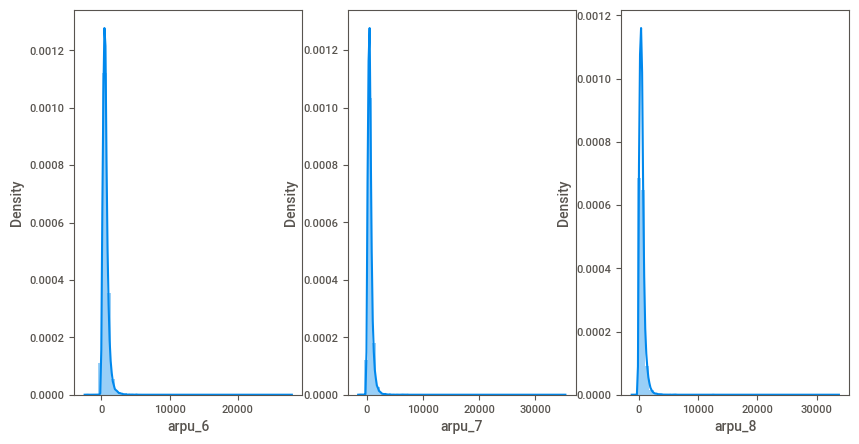

In [209]:
fig, axes = plt.subplots(1, 3, figsize = (10,5))
varlist = ['arpu_6','arpu_7','arpu_8']
multiple_univariate(varlist)

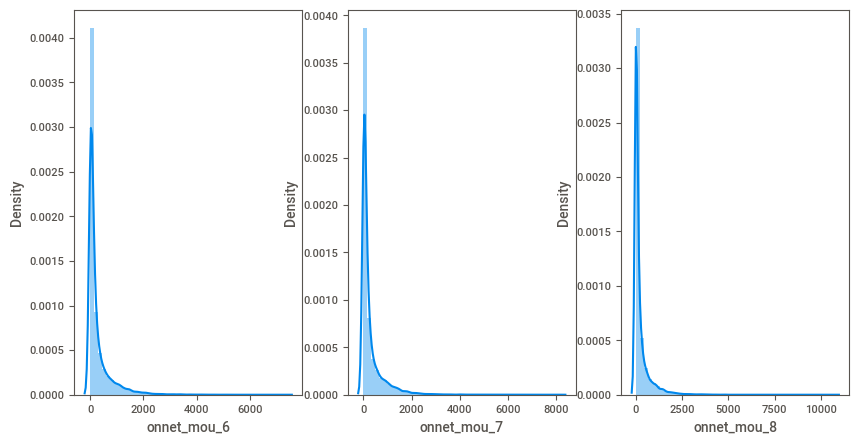

In [210]:
fig, axes = plt.subplots(1, 3, figsize = (10,5))
varlist = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']
multiple_univariate(varlist)

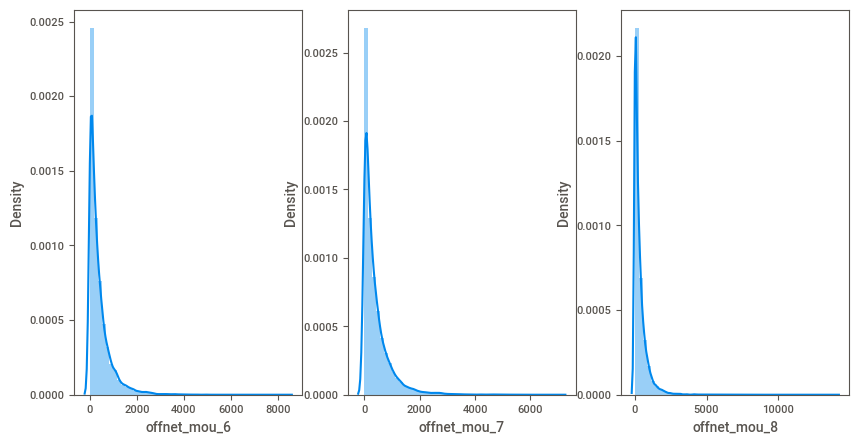

In [211]:
fig, axes = plt.subplots(1, 3, figsize = (10,5))
varlist = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']
multiple_univariate(varlist)

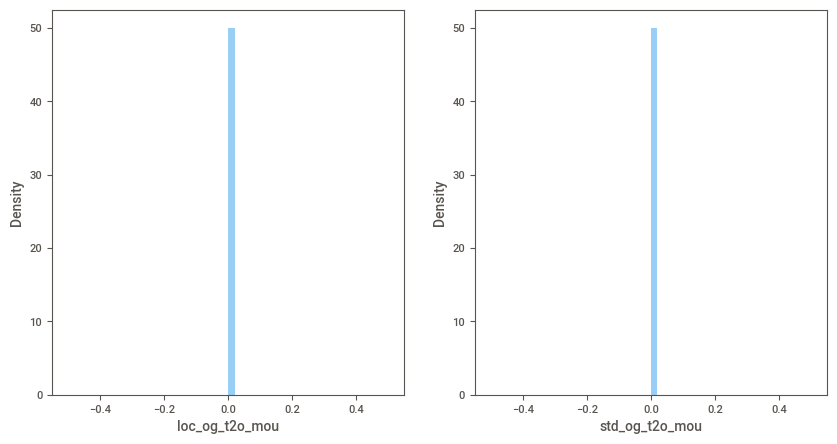

In [212]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
varlist = ['loc_og_t2o_mou','std_og_t2o_mou']
multiple_univariate(varlist)

 > **Insights:** The above variables are very skewed towards the left

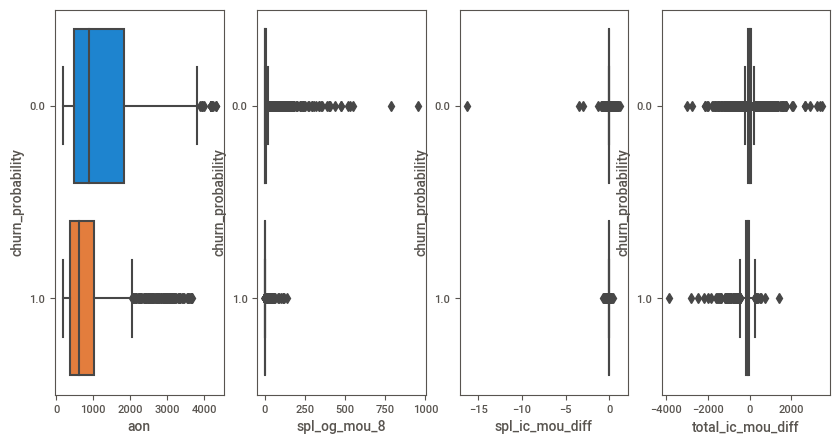

In [213]:
fig, axes = plt.subplots(1, 4, figsize = (10,5))
varlist = ['aon','spl_og_mou_8','spl_ic_mou_diff','total_ic_mou_diff']
multiple_bivriate(varlist, 'churn_probability')

> **Insights:** The age on network number of days is more for the non-churn users

In [214]:
pd.crosstab(high_val_cust.churn_probability, high_val_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn_probability,,,
0.0,85.223232,96.943412,97.247706
1.0,14.776768,3.056588,2.752294


In [215]:
pd.crosstab(high_val_cust.churn_probability, high_val_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,29.0,30.0,38.0,41.0
churn_probability,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14395,1041,255,119,63,58,28,22,19,14,11,6,8,6,2,4,2,2,3,1,3,2,2,1,1,1,1,1
1.0,1378,30,2,6,3,1,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,695.49,707.34,648.04,597.69,630.21,682.69
Churned,846.82,669.35,271.50,748.54,633.45,474.94


<Figure size 1700x700 with 0 Axes>

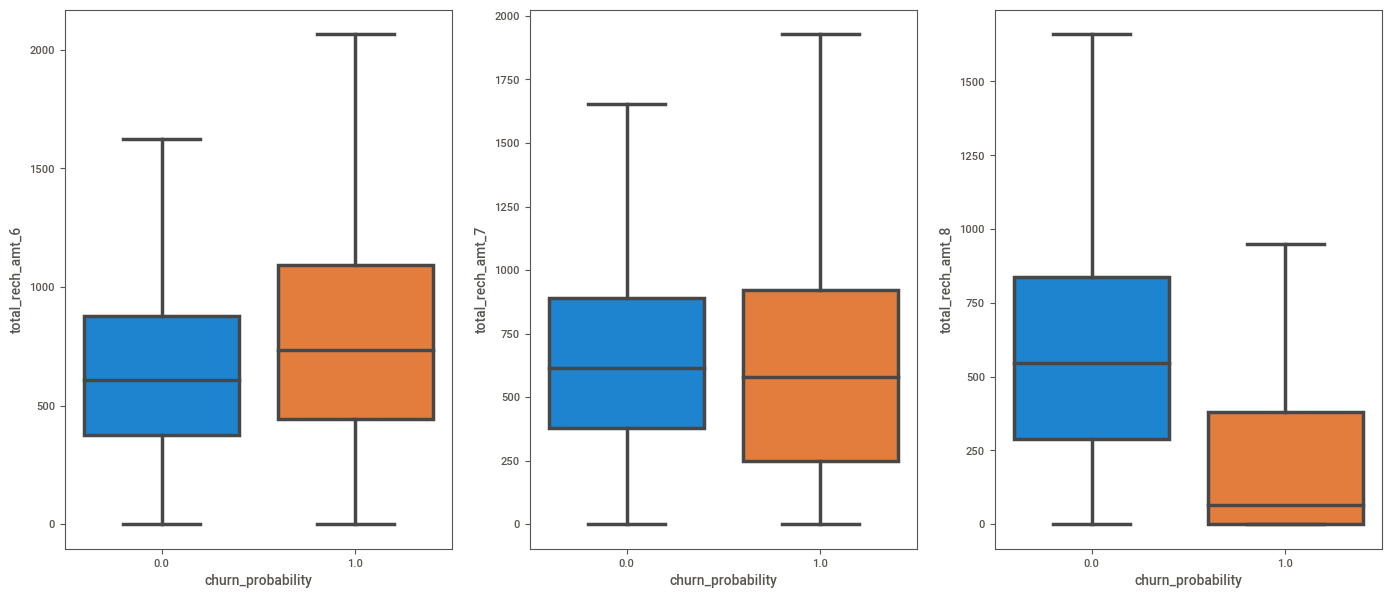

In [216]:
# Analyzing churn data with all the three months, on the basis of total recharge amount
analyze_feature('total_rech_amt')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,173.05,177.9,170.81,179.76,176.77,171.16
Churned,180.61,167.6,91.96,226.27,239.26,188.01


<Figure size 1700x700 with 0 Axes>

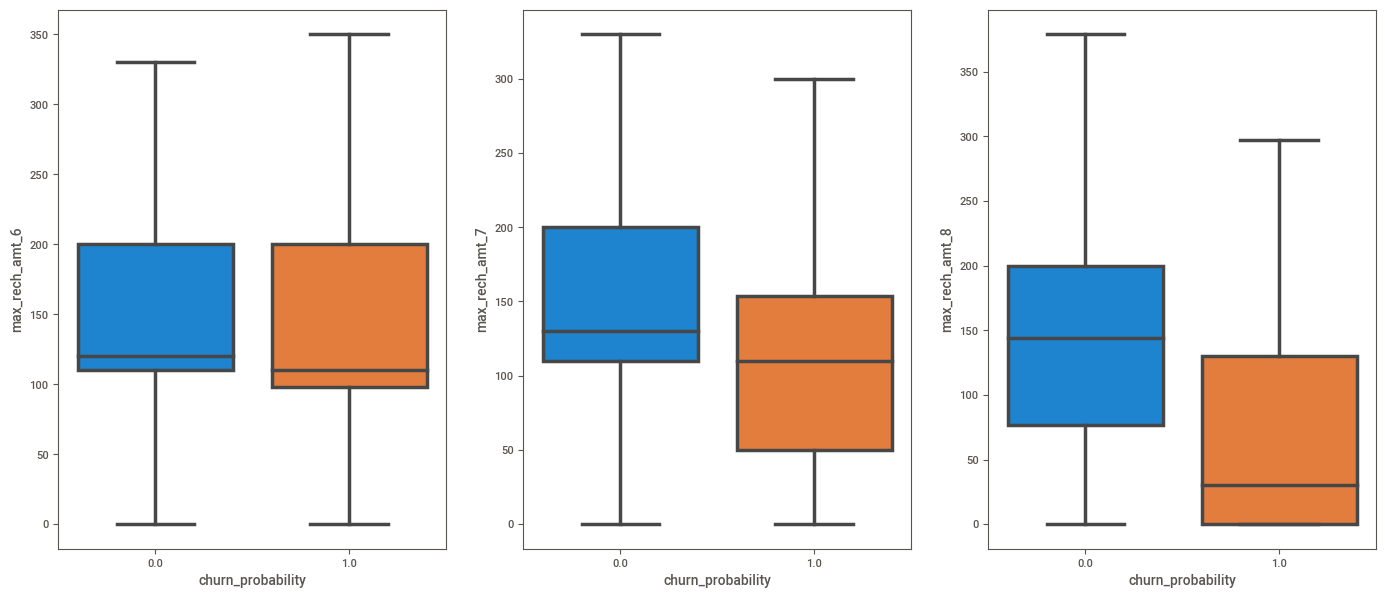

In [217]:
# let's analyze maximum recharge amount 
analyze_feature('max_rech_amt')

> **Insights:** We can there is gradual and drastic drop in churn in the month of August, while considering total recharge amount and max recharge amount

### Outlier treatment

In [218]:
# let's cap the outlier, by using upper and lower limit as filtered on mean values
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [219]:
# cap outliers in the numeric columns
high_val_cust[num_cols] = high_val_cust[num_cols].apply(cap_outliers, axis=0)

In [220]:
high_val_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,17495.0,17495.0,17495.0,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.0,17495.0,17495.0,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.0,17495.0,17495.0,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,17495.000000,174

In [221]:
# Also, let's remove the columns which have no variance and dont contribute anything to model building
col_list = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8']
high_val_cust = high_val_cust.drop(col_list,axis=1)

In [222]:
high_val_cust.shape

(17495, 163)

<AxesSubplot:>

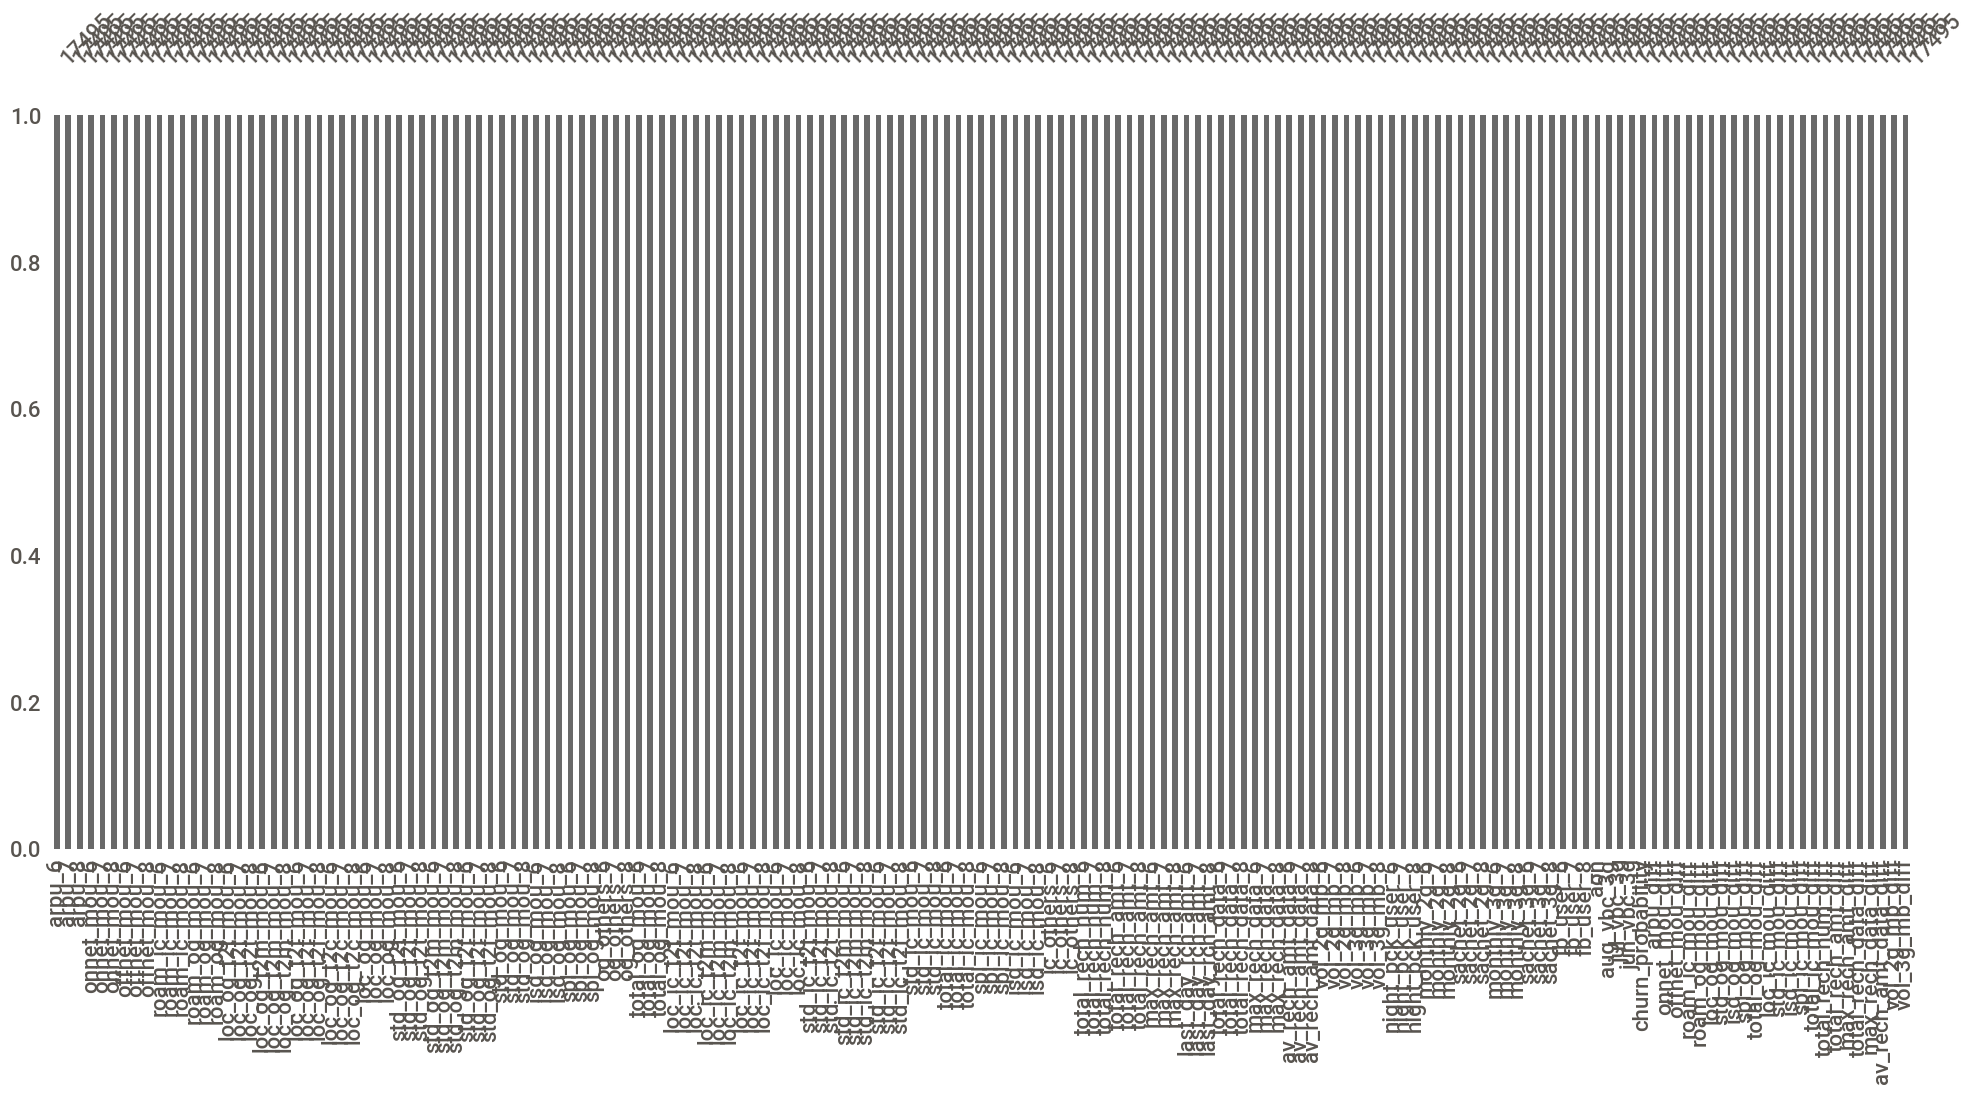

In [223]:
# though it will look messy, but we certainly know now that there wont be any missing values in the dataset :)
mn.bar(high_val_cust)

<AxesSubplot:>

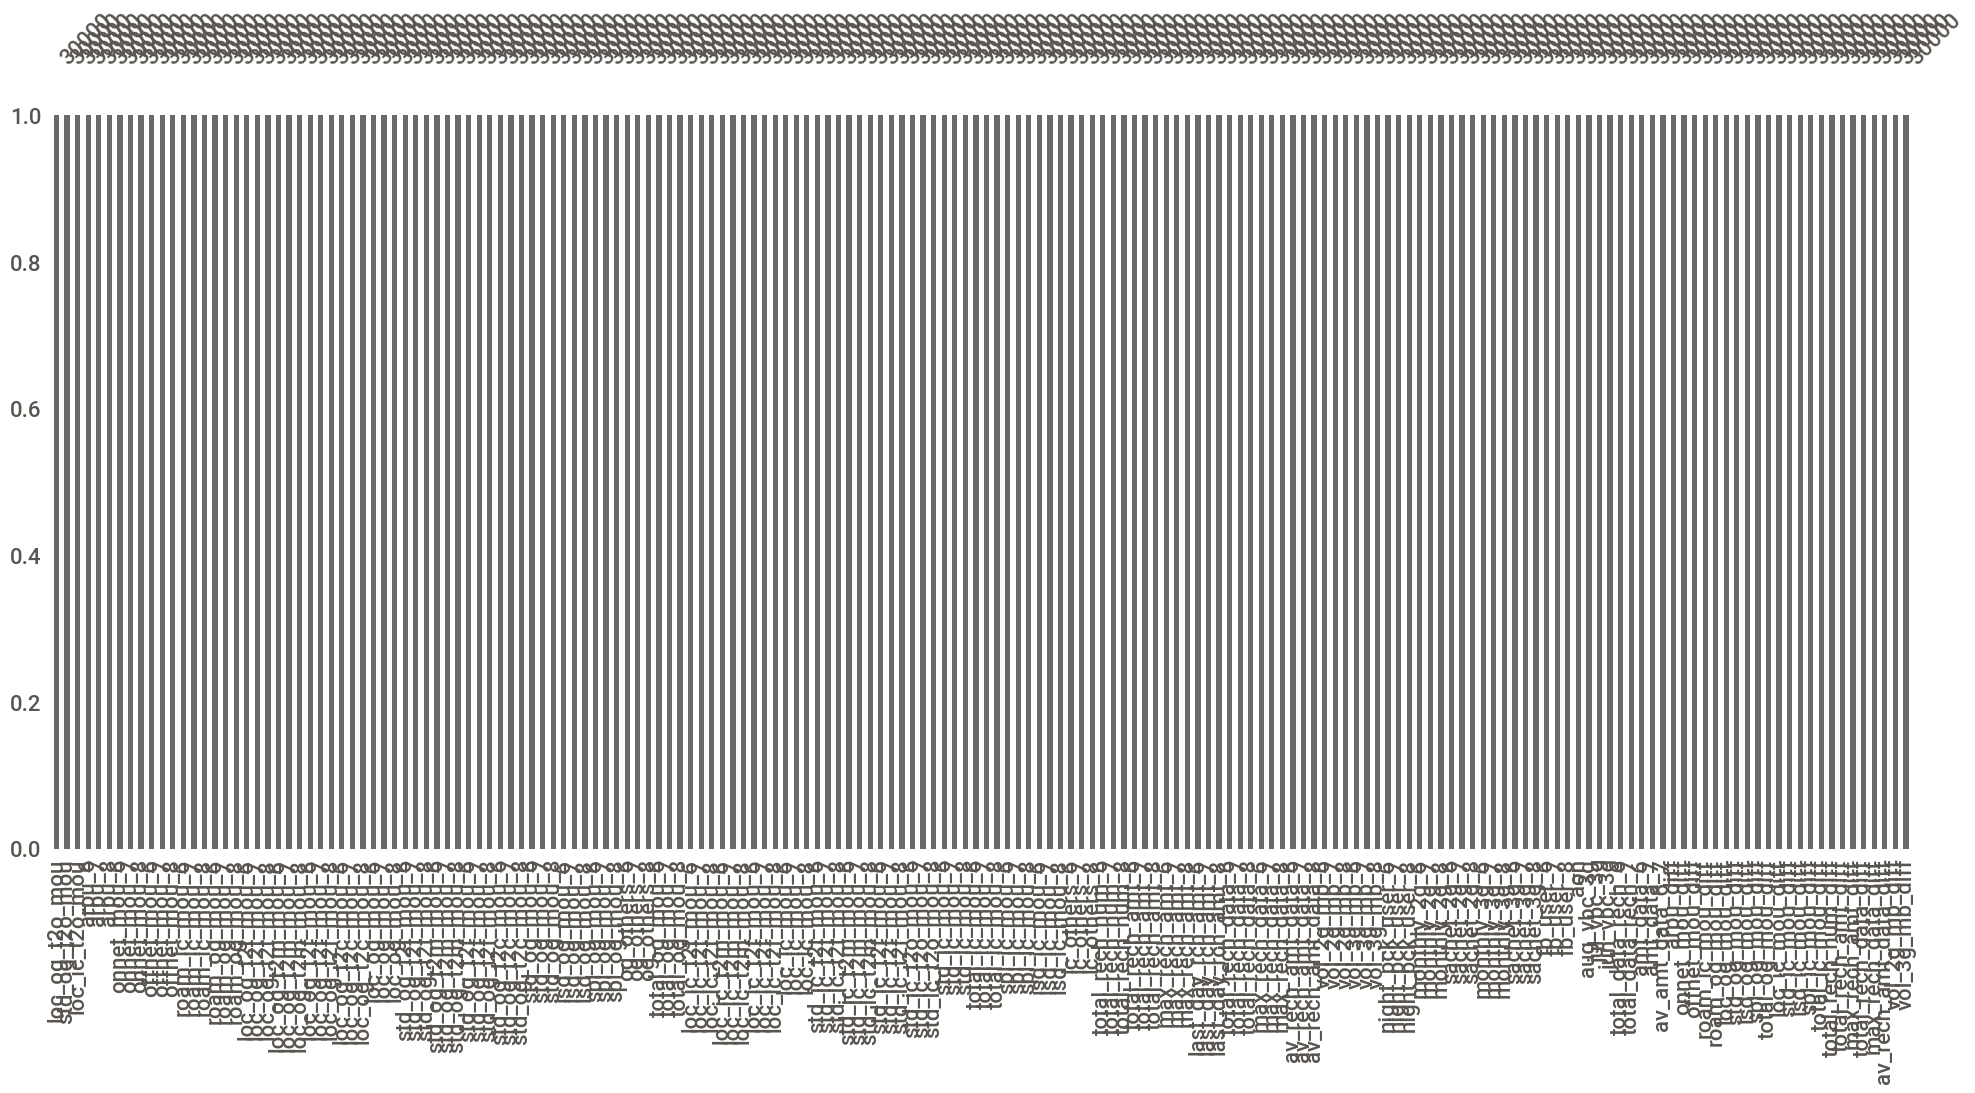

In [224]:
# dont forget to ensure that kaggle testset should also dont have any missing values :)
mn.bar(Kaggle_test_dataset)

# *`Step 3: Model selection, model building, evaluation & prediction`*

In [225]:
# firstly we will change churn_probability columns from categorical to numeric data type, to use it in model building 
high_val_cust['churn_probability'] = pd.to_numeric(high_val_cust['churn_probability'])

In [226]:
high_val_cust.dtypes['churn_probability']

dtype('float64')

In [227]:
# divide data into train and test
X = high_val_cust.drop("churn_probability", axis = 1)
y = high_val_cust.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

### Let's aggreagate the categorical variables and then we will replace the categories with those aggreagated values in each colum. It will be helpful in building the model

In [228]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print("Night Pack User for month June: ", train.groupby('night_pck_user_6').churn_probability.mean())
print("\nNight Pack User for month July: ", train.groupby('night_pck_user_7').churn_probability.mean())
print("\nNight Pack User for month August: ", train.groupby('night_pck_user_8').churn_probability.mean())
print("\nFB User for month June: ", train.groupby('fb_user_6').churn_probability.mean())
print("\nFB User for month July: ", train.groupby('fb_user_7').churn_probability.mean())
print("\nFB User for month August: ", train.groupby('fb_user_8').churn_probability.mean())

Night Pack User for month June:  night_pck_user_6
-1.0    0.100338
0.0     0.067719
1.0     0.097938
Name: churn_probability, dtype: float64

Night Pack User for month July:  night_pck_user_7
-1.0    0.120424
0.0     0.055606
1.0     0.066667
Name: churn_probability, dtype: float64

Night Pack User for month August:  night_pck_user_8
-1.0    0.148618
0.0     0.028861
1.0     0.031056
Name: churn_probability, dtype: float64

FB User for month June:  fb_user_6
-1.0    0.100338
0.0     0.073260
1.0     0.068110
Name: churn_probability, dtype: float64

FB User for month July:  fb_user_7
-1.0    0.120424
0.0     0.063465
1.0     0.055253
Name: churn_probability, dtype: float64

FB User for month August:  fb_user_8
-1.0    0.148618
0.0     0.074792
1.0     0.023924
Name: churn_probability, dtype: float64


In [229]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.100338, 0: 0.067719, 1: 0.097938},
           'night_pck_user_7' : {-1: 0.120424, 0: 0.055606, 1: 0.066667},
           'night_pck_user_8' : {-1: 0.148618, 0: 0.028861, 1: 0.031056},
           'fb_user_6'        : {-1: 0.100338, 0: 0.073260, 1: 0.068110},
           'fb_user_7'        : {-1: 0.120424, 0: 0.063465, 1: 0.055253},
           'fb_user_8'        : {-1: 0.148618, 0: 0.074792, 1: 0.023924}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [230]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn_probability']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13121 entries, 8747 to 17058
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  13121 non-null  category
 1   night_pck_user_7  13121 non-null  category
 2   night_pck_user_8  13121 non-null  category
 3   fb_user_6         13121 non-null  category
 4   fb_user_7         13121 non-null  category
 5   fb_user_8         13121 non-null  category
dtypes: category(6)
memory usage: 180.2 KB


## Implementing PCA

As we have a large number of attributes, and thus we should first try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, we can use any classification model. 

In [231]:
# Applying PCA to train data using pipeline
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [232]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [233]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.86
1       21.31
2       27.12
3       32.16
4       36.02
5       39.72
6       42.45
7       45.05
8       47.35
9       49.56
10      51.53
11      53.46
12      55.26
13      56.95
14      58.57
15      60.01
16      61.40
17      62.77
18      64.09
19      65.37
20      66.58
21      67.75
22      68.88
23      69.98
24      71.01
25      72.00
26      72.97
27      73.90
28      74.81
29      75.71
30      76.56
31      77.39
32      78.20
33      79.00
34      79.78
35      80.51
36      81.23
37      81.93
38      82.59
39      83.24
40      83.86
41      84.43
42      84.97
43      85.51
44      86.04
45      86.52
46      86.99
47      87.45
48      87.89
49      88.32
50      88.71
51      89.09
52      89.46
53      89.81
54      90.15
55      90.48
56      90.80
57      91.12
58      91.44
59      91.75
60      92.06
61      92.35
62      92.64
63      92.93
64      93.20
65      93.46
66      93.72
67      93.96
68      94.20
69      94.43
70      94.65
71    

> **Insights:** 
>
>- various components have much higher variance(almost equal to greater than 80%)

<Figure size 875x500 with 0 Axes>

Text(0.5, 0, 'Features')

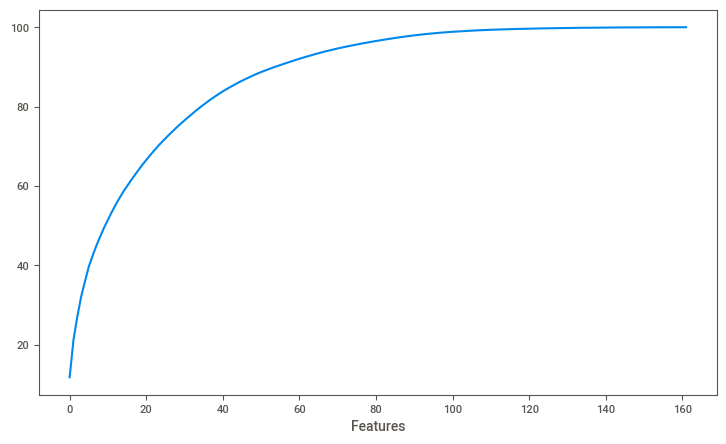

In [234]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.xlabel('Features')
plt.plot(cumulative_variance)

### PCA and Logistic Regression

In [235]:
# creating pipeline  to carryout PCA analysis and logistic regression
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pca_log_model = Pipeline(steps)

In [236]:
# fit model
pca_log_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [237]:
# check score on train data
pca_log_model.score(X_train, y_train)

0.8263851840560933

**Evaluating on test data**

In [238]:
def evaluate_test(model):
    # predict churn on test data
    y_pred = model.predict(X_test)

    # create onfusion matrix
    print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

    # check sensitivity and specificity
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
    print("\nSensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

    # check area under curve
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [239]:
evaluate_test(pca_log_model)

Confusion Matrix : 
 [[3315  703]
 [  65  291]]

Sensitivity: 	0.82
Specificity: 	0.83
AUC:    	 0.89


**Hyperparameter tuning**

In [240]:
# class imbalance
y_train.value_counts()/y_train.shape

0.0    0.918604
1.0    0.081396
Name: churn_probability, dtype: float64

In [241]:
# Ratio of classes 
class_0 = y_train[y == 0].count()
class_1 = y_train[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.089


As we can see, there's major class imbalance in the train data, so we need to handle this by using class weight, so that the cost function will be adjusted

In [242]:
# PCA
pca = PCA()

# assigning class weight through logistic regression
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_log_model = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60,70,75, 80], 'logistic__C': [0.1,0.2, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
pca_log_model1 = GridSearchCV(estimator=pca_log_model, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [244]:
# fit model
pca_log_model1.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 70, 75, 80]},
             scoring='roc_auc', verbose=1)

In [245]:
# cross validation results
pd.DataFrame(pca_log_model1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.277721,0.072557,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
1,1.422198,0.063433,0.000000,0.000000,0.1,l1,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
2,1.430797,0.041257,0.000000,0.000000,0.1,l1,75,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,52
3,1.472395,0.050187,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
4,1.672999,0.145709,0.058799,0.008863,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.893818,0.887721,0.889914,0.893735,0.890055,0.891049,0.002376,25
5,1.704397,0.157785,0.058599,0.005988,0.1,l2,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.895764,0.886825,0.891489,0.896865,0.892651,0.892719,0.003541,2
6,1.585394,0.205632,0.060202,0.008954,0.1,l2,75,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.895936,0.886311,0.890455,0.895791,0.891880,0.892075,0.003594,9
7,1.857796,0.163403,0.076400,0.015663,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.895971,0.886452,0.888054,0.895812,0.892151,0.891688,0.003904,14
8,1.341597,0.131102,0.000000,0.000000,0.2,l1,60,"{'logistic__C': 0.2, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
9,1.308199,0.060312,0.000000,0.000000,0.2,l1,70,"{'logistic__C': 0.2, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55


In [246]:
# print best hyperparameters
print("Best AUC: ", pca_log_model1.best_score_)
print("Best hyperparameters: ", pca_log_model1.best_params_)

Best AUC:  0.8929054097609047
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2', 'pca__n_components': 70}


**Evaluating on test data for logistic regression**

In [247]:
evaluate_test(pca_log_model1)

Confusion Matrix : 
 [[3458  560]
 [  74  282]]

Sensitivity: 	0.79
Specificity: 	0.86
AUC:    	 0.9


## Random Forest

After evaluating model for PCA and PCA with logistic regression, we have seen gradual increase in the AUC score for the model. Now let's try building model using random forest and compare the results

In [248]:
# random forest 
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
pca_rand_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [249]:
# fit model
pca_rand_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [250]:
# print best hyperparameters
print("Best AUC: ", pca_rand_model.best_score_)
print("Best hyperparameters: ", pca_rand_model.best_params_)

Best AUC:  0.9244405006195315
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [251]:
evaluate_test(pca_rand_model)

Confusion Matrix : 
 [[3970   48]
 [ 211  145]]

Sensitivity: 	0.41
Specificity: 	0.99
AUC:    	 0.93


> **Insights:** 
>
>- With random forest, we are getting very poor sensitivity, though AUC score increased
>- With PCA and Logistic regression, we are getting better results, in terms of sensitivity and AUC score too.

Now, we need to pick the best features by calculating the feature importance of the variables

In [252]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

pca_rand_model2 = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9},
                                  oob_score=True, random_state=100, verbose=1)

13


In [253]:
# fit model
pca_rand_model2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=100, verbose=1)

In [254]:
# checking OOB score
pca_rand_model2.oob_score_

0.9423062266595534

In [255]:
evaluate_test(pca_rand_model2)
# checking area under curve
y_pred_prob = pca_rand_model2.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Confusion Matrix : 
 [[3973   45]
 [ 226  130]]

Sensitivity: 	0.37
Specificity: 	0.99
AUC:    	 0.93
ROC:    	 0.93


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### feature importance

In [256]:
# predictors
feature = high_val_cust.drop('churn_probability', axis=1).columns

# feature_importance
importance = pca_rand_model2.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_mou_8,4.788235
1,loc_ic_t2t_mou_8,4.484804
2,total_ic_mou_8,4.357540
3,loc_ic_t2m_mou_8,3.983008
4,total_rech_amt_8,3.367973
5,arpu_diff,3.172364
6,last_day_rch_amt_8,2.481013
7,loc_og_mou_8,2.252235
8,loc_og_t2t_mou_8,2.227203
9,loc_og_t2m_mou_8,1.991813


### Extracting top n features

In [257]:
# let take n=40
top_features = feature_importance.variables[0:40]


<AxesSubplot:>

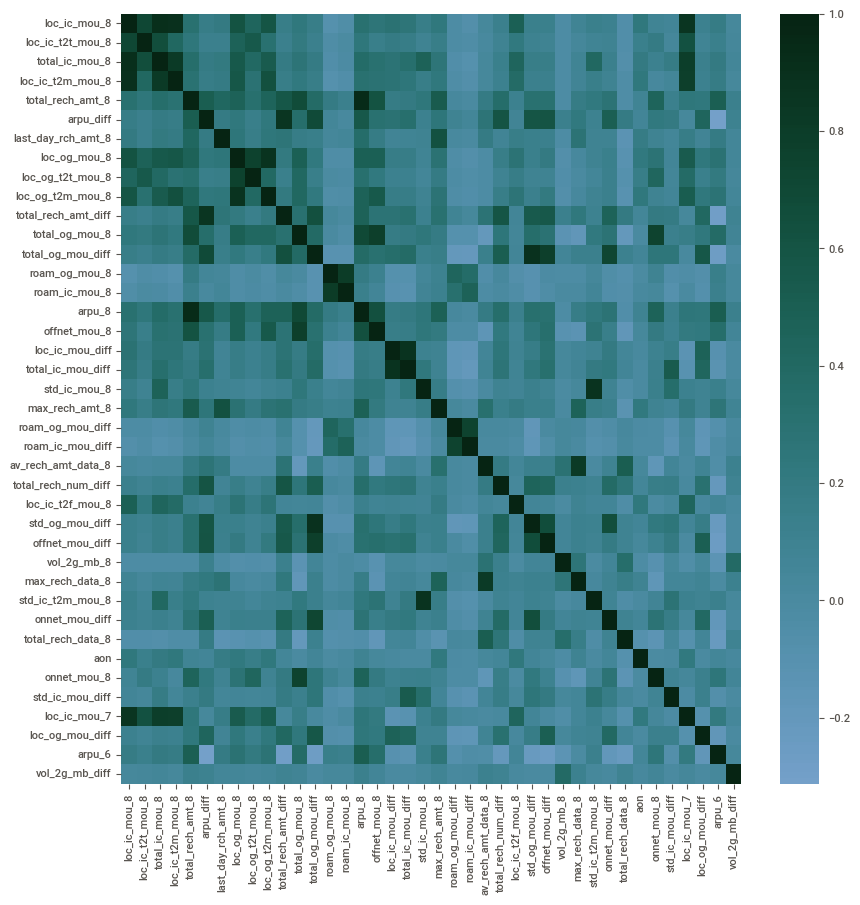

In [258]:
# plotting correlation 
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.cubehelix_palette(199, 359, hue=1,dark=0.10, as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [259]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8','loc_ic_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

### Now after PCA, we got the top features. We will use other classifictaion models to optimize the scores 

In [260]:
# logistic regression
step = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compiling
logistic = Pipeline(step)

# hyperparameter
param = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# 5 folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# creating gridsearch
pca_log_model2 = GridSearchCV(estimator = logistic, cv = fold, param_grid = param, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [261]:
# fitting the model
pca_log_model2.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [262]:
# best hyperparameters score
pca_log_model2.best_score_

0.8733925877889502

In [263]:
# best hyperparameters
pca_log_model2.best_params_

{'logistic__C': 4, 'logistic__penalty': 'l2'}

In [264]:
evaluate_test(pca_log_model2)

# checking area under curve
y_pred_prob = pca_log_model2.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Confusion Matrix : 
 [[3405  613]
 [  78  278]]

Sensitivity: 	0.78
Specificity: 	0.85
AUC:    	 0.88
ROC:    	 0.88


## XGBoost with PCA

Let's try XGBoost this time to check if we can better AUC score for our final model

In [265]:
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',                               
                                  
                                  )  


In [266]:
pca_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [267]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train)[:, 1])

Baseline Train AUC Score


0.9955676023281692

In [268]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test)[:, 1])

Baseline Test AUC Score


0.8850705532966818

In [269]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [100,150,200]
              }
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_ty...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [270]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.9147359522320688
Best Parameters : {'gamma': 50, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 25, 'n_estimators': 100}


In [271]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train)
y_train_pred_pca_xgb_best[:5]

array([0, 0, 1, 0, 0])

In [272]:
# Prediction on test set
#X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test, index=X_test.index, columns = X_train.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test)
y_test_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [273]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

evaluate_test(pca_xgb_search)

Confusion Matrix : 
 [[3487  531]
 [  67  289]]

Sensitivity: 	0.81
Specificity: 	0.87
AUC:    	 0.9


> **Insights:** 
>
>- With PCA+Logistic regression, we get the better results than random forest
>- With PCA+XGBoost, the performance increases 

### Extracting the intercept and the coefficients from the logistic model 

In [274]:
# for calculating intercepts and coefficients, we will be considering pca+logictic model as the final go
logistic_model = pca_log_model2.best_estimator_.named_steps['logistic']

In [275]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [276]:
# coefficients
coefficients = logistic_model.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [277]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8,loc_ic_mou_8
0,-1.543662,0.322318,-0.670359,-0.929635,0.228214,-0.038848,0.206526,-0.335188,-0.806055,0.389734,-1.640085


# `Step 4: Final Insights and Conclusion`


### Now we get the final results and can derive the major components for churn in the telecom company. 
>**TOP 4 factors**
>- std_og_mou_8
>- total_ic_mou_8
>- arpu_8
>- roam_og_mou_8

>**Other Factors**
>- total_rech_amt_diff	
>- total_og_mou_8
>- roam_ic_mou_8
>- std_ic_mou_8	
>- av_rech_amt_data_8
>- loc_ic_mou_8

### Steps to optimize the chances of not-churn

- Provide special discount to the customers, based on their usage.
- Make some schemes to get additional benefits after recharging an unlimited plans
- Avail regular one-to-one feedback form the customer to know more about the issues
- Lower tariffs on data usage,a better 2G area coverage where 3G is not available.
- Provide extra internet datapack on every recharge.

# `Step 5: Evaluating final model on the kaggle test data set`

Now for getting the best results on the final test set, we will be considering model which has highest accuracy score i.e. pca+xgboost model. 

In [278]:
Kaggle_test_dataset.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5.0,5.0,4.0,103.0,90.0,60.0,50.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1692.0,0.00,0.00,0.00,0.0,0.0,103.0,90.0,96.5,-14.1610,-2.895,-11.330,0.000,0.000,-14.430,0.175,0.0,0.030,-14.225,-9.975,3.640,0.000,-0.05,-6.385,-1.0,-36.5,-10.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.

In [279]:
# so we will be considering the best model result for the final prediction
# we can also check our test result with all the model we got, for now being we are taking xgboost for the final model
final_model = pca_xgb_search

In [280]:
# Train data
Train_data = original
Train_data = Train_data.drop('churn_probability',axis=1)

In [281]:
# verfying shapes of both datasets
Train_data.shape
Kaggle_test_dataset.shape

(69999, 171)

(30000, 176)

In [282]:
# we need to drop date columns, to skip the conflicts of datatypes while fitting model
columns_to_drop = ['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
Train_data = Train_data.drop(columns=columns_to_drop)

In [283]:
# taking X and Y for the final train set
X = Train_data
y = data.churn_probability
final_model.fit(X,y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_ty...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [284]:
X_test_final = pd.DataFrame(Kaggle_test_dataset, index=Kaggle_test_dataset.index, columns = X.columns)
y_test_pred = final_model.predict(X_test_final)

# we have the predicted values of churn for the test data
y_test_pred

array([0, 0, 1, ..., 1, 0, 0])

In [285]:
# verify whether the resulting columns has same rows as test dataset
y_test_pred.shape

(30000,)

In [286]:
# Now append these predictions of churn probability in our sample csv file
sample_file = pd.read_csv(r'C:\Upgrad Program\Machine Learning 2\Telecom Churn case study\telecom-churn-case-study-hackathon-c48\sample (2).csv')

In [288]:
# append the predicted churn in sample csv file
sample_file['churn_probability'] = y_test_pred

In [289]:
#save the file with updated column
sample_file.to_csv(r'C:\Upgrad Program\Machine Learning 2\Telecom Churn case study\telecom-churn-case-study-hackathon-c48\sample (2).csv', index=False)